# Preprocess all initiatives and prepare nodes for graph

In [2]:
import pandas as pd
%matplotlib inline

df = pd.read_csv('initiatives_lv.csv')
df.count()

id              1265
url             1265
status          1265
target          1265
voted           1265
goal-reached    1265
author          1265
created-at      1265
updated-at      1265
needs-review    1265
published-at     289
language        1265
title           1265
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa79f376d8>]],
      dtype=object)

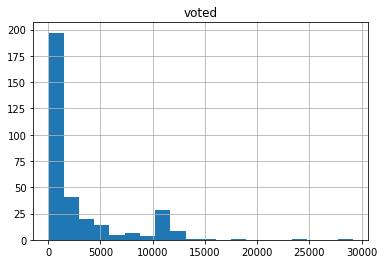

In [3]:
#Lets find votes >= 50
active = df.loc[df['voted'] >= 50]
active.hist(column='voted', bins = 20)

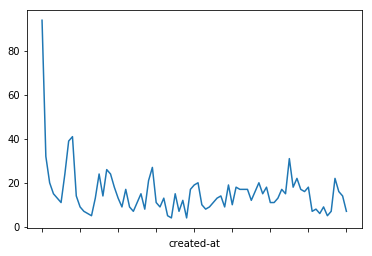

In [4]:
# time series for newly created initiatives based on month
import datetime as dt
def convertdate(incoming):
    if len(incoming) > 14:
        out = dt.datetime.strptime(incoming, '%Y-%m-%d %H:%M:%S.%f')
    else:
        out = dt.datetime.strptime(incoming, '%m/%d/%y %H:%M')
    return out

ts = df.loc[:,['id', 'title', 'created-at']]
ts.loc[:,'created-at'] = ts['created-at'].apply(convertdate)

series = ts.groupby(ts['created-at'].dt.strftime('%Y-%m'))['title'].count()

series.plot.line()


In [5]:
#lets export nodes.csv

data_export = active[['id', 'title','voted']]
data_export.to_csv('nodes.csv', encoding='utf=8', index=False)